In [8]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [9]:
VZ_url = "https://data.nasdaq.com/api/v3/datasets/WIKI/VZ.csv?start_date=2013-03-27"
VZ_df = pd.read_csv(VZ_url)

VZ_df

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2018-03-27,47.10,47.9024,46.840,47.31,13995096.0,0.0,1.0,47.100000,47.902400,46.840000,47.310000,13995096.0
1,2018-03-26,46.78,47.1700,46.585,47.07,15253706.0,0.0,1.0,46.780000,47.170000,46.585000,47.070000,15253706.0
2,2018-03-23,47.06,47.4550,46.200,46.29,15829967.0,0.0,1.0,47.060000,47.455000,46.200000,46.290000,15829967.0
3,2018-03-22,47.10,47.5199,46.770,46.88,14210836.0,0.0,1.0,47.100000,47.519900,46.770000,46.880000,14210836.0
4,2018-03-21,47.69,47.9600,47.270,47.28,11039354.0,0.0,1.0,47.690000,47.960000,47.270000,47.280000,11039354.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2013-04-03,49.43,49.5800,48.660,48.99,14373500.0,0.0,1.0,40.414218,40.536858,39.784662,40.054471,14373500.0
1255,2013-04-02,49.53,49.8600,49.260,49.50,12082000.0,0.0,1.0,40.495978,40.765788,40.275225,40.471450,12082000.0
1256,2013-04-01,49.06,49.3800,49.008,49.22,6926600.0,0.0,1.0,40.111704,40.373337,40.069188,40.242520,6926600.0
1257,2013-03-28,48.99,49.1900,48.900,49.15,13567000.0,0.0,1.0,40.054471,40.217992,39.980887,40.185288,13567000.0


In [10]:
# Check the data types for one of the dataframes (since they all come from the same API)
VZ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1259 non-null   object 
 1   Open         1259 non-null   float64
 2   High         1259 non-null   float64
 3   Low          1259 non-null   float64
 4   Close        1259 non-null   float64
 5   Volume       1259 non-null   float64
 6   Ex-Dividend  1259 non-null   float64
 7   Split Ratio  1259 non-null   float64
 8   Adj. Open    1259 non-null   float64
 9   Adj. High    1259 non-null   float64
 10  Adj. Low     1259 non-null   float64
 11  Adj. Close   1259 non-null   float64
 12  Adj. Volume  1259 non-null   float64
dtypes: float64(12), object(1)
memory usage: 128.0+ KB


In [11]:
# Change the 'Date' data in each dataframe to datetime/timestamp, instead of object
VZ_df["Date"] = pd.to_datetime(VZ_df["Date"], format="%Y/%m/%d")

# Double check that the data type change went through:
VZ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1259 non-null   datetime64[ns]
 1   Open         1259 non-null   float64       
 2   High         1259 non-null   float64       
 3   Low          1259 non-null   float64       
 4   Close        1259 non-null   float64       
 5   Volume       1259 non-null   float64       
 6   Ex-Dividend  1259 non-null   float64       
 7   Split Ratio  1259 non-null   float64       
 8   Adj. Open    1259 non-null   float64       
 9   Adj. High    1259 non-null   float64       
 10  Adj. Low     1259 non-null   float64       
 11  Adj. Close   1259 non-null   float64       
 12  Adj. Volume  1259 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 128.0 KB


In [12]:
VZ_df.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000,1259.0,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,49.054948,49.378763,48.694074,49.053047,1.615053e+07,0.007857,1.0,45.285619,45.584667,44.952845,45.283973,1.615053e+07
std,2.557755,2.558734,2.560203,2.560857,1.923956e+07,0.065305,0.0,3.894278,3.913690,3.881256,3.897310,1.923956e+07
min,42.550000,42.900000,38.060000,42.840000,4.108274e+06,0.000000,1.0,37.983618,38.717923,35.145269,38.309049,4.108274e+06
25%,47.226500,47.512500,46.844300,47.225000,1.095680e+07,0.000000,1.0,42.281314,42.570556,42.012178,42.317287,1.095680e+07
50%,49.040000,49.365000,48.730000,49.050000,1.358152e+07,0.000000,1.0,44.188242,44.495104,43.896072,44.220000,1.358152e+07
75%,50.530000,50.870000,50.175000,50.525000,1.778573e+07,0.000000,1.0,48.635551,48.885937,48.290625,48.649879,1.778573e+07
max,56.320000,56.950000,56.320000,56.530000,6.166205e+08,0.577500,1.0,54.600000,54.770000,54.340000,54.720000,6.166205e+08


count    1259.000000
mean       49.053047
std         2.560857
min        42.840000
25%        47.225000
50%        49.050000
75%        50.525000
max        56.530000
Name: Close, dtype: float64
Initial Closing Price: 48.94, (2013-03-27 00:00:00)
Latest Closing Price: 47.31, (2018-03-27 00:00:00)
Total Change in Price: -1.63


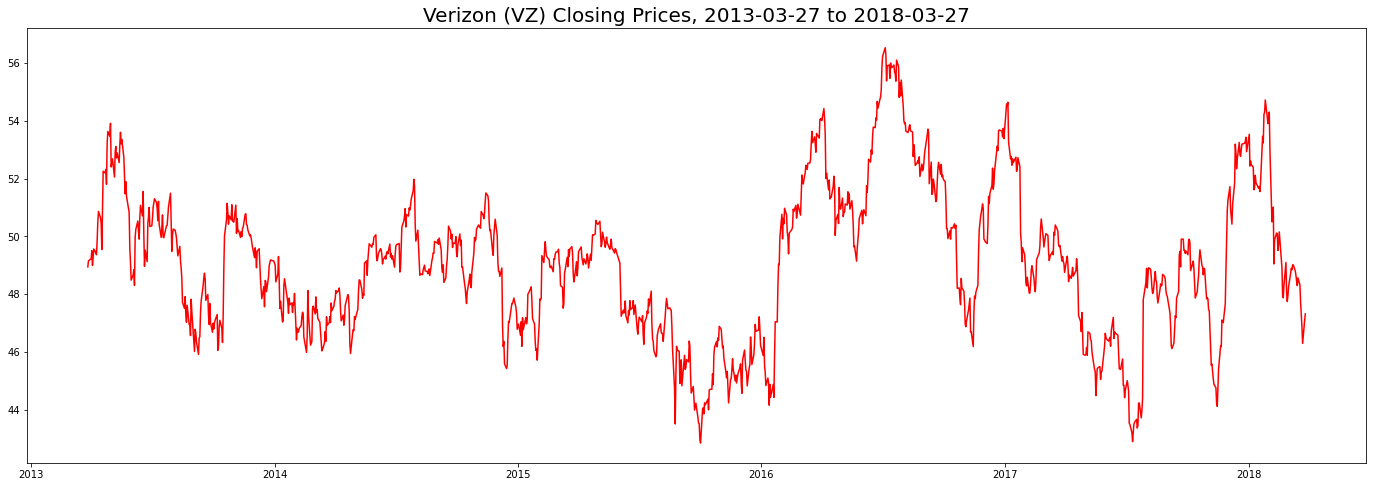

In [13]:
# Graph the past 5 years' closing prices
y_5yr = VZ_df["Close"]
x_5yr = VZ_df["Date"]

# initial_close needs to be recalculated
initial_close = y_5yr.iloc[-1]
recent_close = y_5yr.iloc[0]

plt.figure(figsize=(24, 8))
plt.title("Verizon (VZ) Closing Prices, 2013-03-27 to 2018-03-27", fontsize=20)
plt.plot(x_5yr, y_5yr, color='red')
plt.savefig("../Images/VZ_closing_5yr.jpg")

print(VZ_df.describe()["Close"])
print(f"Initial Closing Price: {initial_close}, ({x_5yr.iloc[-1]})")
print(f"Latest Closing Price: {recent_close}, ({x_5yr.iloc[0]})")
print(f"Total Change in Price: {round(recent_close - initial_close, 2)}")

count    252.000000
mean      48.280417
std        2.635613
min       42.890000
25%       46.435000
50%       48.310000
75%       49.482500
max       54.720000
Name: Close, dtype: float64
Initial Closing Price: 49.14, (2017-03-27 00:00:00)
Latest Closing Price: 47.31, (2018-03-27 00:00:00)
Total Change in Price: -1.83


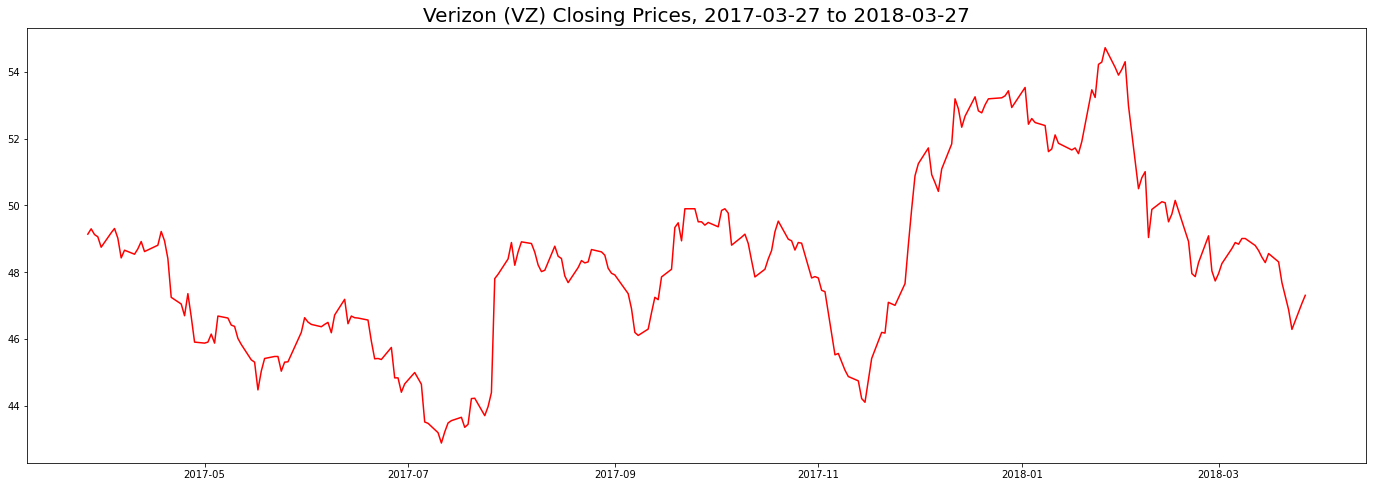

In [14]:
# Graph just the past year's worth of data
mask = (VZ_df["Date"] > '2017-03-26') & (VZ_df["Date"] <= '2018-03-27')
VZ_1yr_df = VZ_df.loc[mask]

y_1yr = VZ_1yr_df["Close"]
x_1yr = VZ_1yr_df["Date"]

# initial_close needs to be recalculated
initial_close = y_1yr.iloc[-1]

plt.figure(figsize=(24, 8))
plt.title("Verizon (VZ) Closing Prices, 2017-03-27 to 2018-03-27", fontsize=20)
plt.plot(x_1yr, y_1yr, color='red')
plt.savefig("../Images/VZ_closing_1yr.jpg")

print(VZ_1yr_df.describe()["Close"])
print(f"Initial Closing Price: {initial_close}, ({x_1yr.iloc[-1]})")
print(f"Latest Closing Price: {recent_close}, ({x_5yr.iloc[0]})")
print(f"Total Change in Price: {round(recent_close - initial_close, 2)}")

count    124.00
mean      49.77
std        2.53
min       44.11
25%       48.08
50%       49.28
75%       51.84
max       54.72
Name: Close, dtype: float64
Initial Closing Price: 49.51, (2017-09-27 00:00:00)
Latest Closing Price: 47.31, (2018-03-27 00:00:00)
Total Change in Price: -2.2


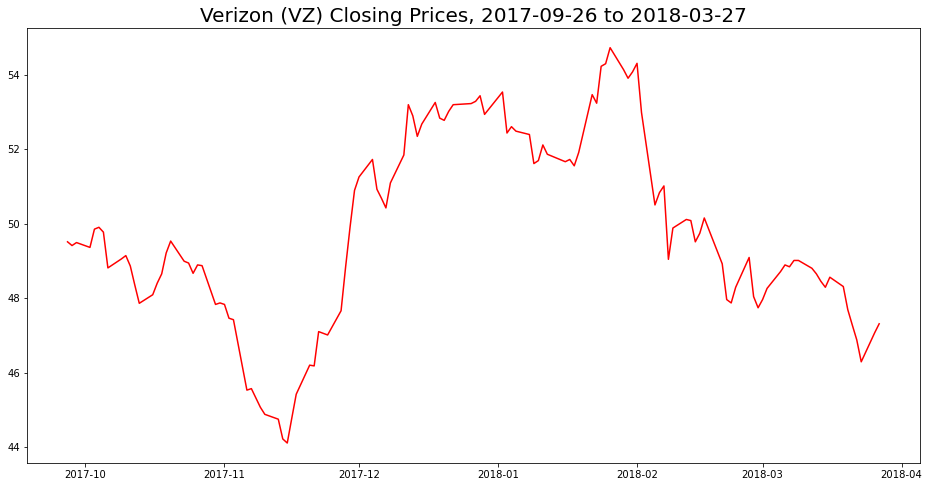

In [18]:
# Charting closing prices for the past six months
mask = (VZ_df["Date"] > '2017-09-26') & (VZ_df["Date"] <= '2018-03-27')
VZ_6mo_df = VZ_df.loc[mask]

y_6mo = VZ_6mo_df["Close"]
x_6mo = VZ_6mo_df["Date"]

# initial_close needs to be recalculated
initial_close = y_6mo.iloc[-1]

plt.figure(figsize=(16, 8))
plt.title("Verizon (VZ) Closing Prices, 2017-09-26 to 2018-03-27", fontsize=20)
plt.plot(x_6mo, y_6mo, color='red')
plt.savefig("../Images/VZ_closing_6mo.jpg")

print(VZ_6mo_df.describe()["Close"])
print(f"Initial Closing Price: {initial_close}, ({x_6mo.iloc[-1]})")
print(f"Latest Closing Price: {recent_close}, ({x_6mo.iloc[0]})")
print(f"Total Change in Price: {round(recent_close - initial_close, 2)}")

What led to the preciptious drop in price from the middle of October 2017 to the middle of November 2017?

count    21.00
mean     48.10
std       0.77
min      46.29
25%      47.69
50%      48.29
75%      48.71
max      49.01
Name: Close, dtype: float64
Initial Closing Price: 48.04, (2018-02-27 00:00:00)
Latest Closing Price: 47.31, (2018-03-27 00:00:00)
Total Change in Price: -0.73


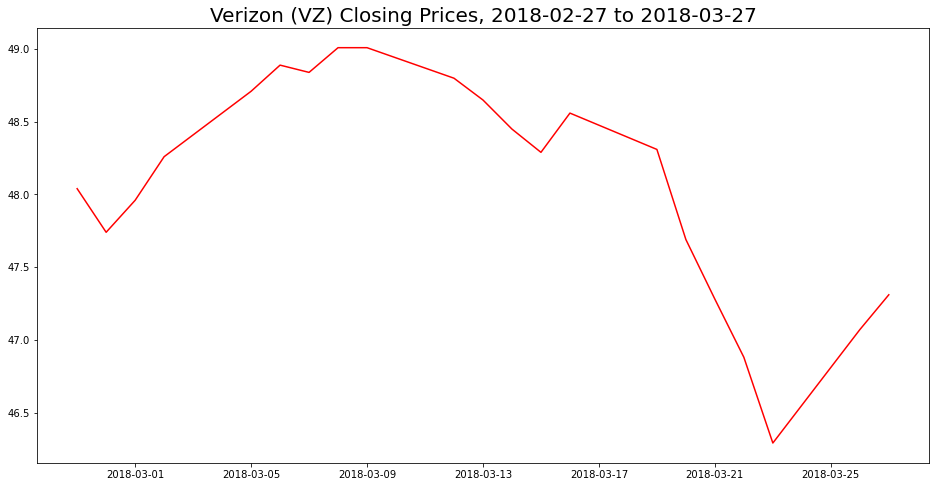

In [17]:
# Graph the past month's data (from this dataset)
mask = (VZ_df["Date"] > '2018-02-26') & (VZ_df["Date"] <= '2018-03-27')
VZ_1mo_df = VZ_df.loc[mask]

y_1mo = VZ_1mo_df["Close"]
x_1mo = VZ_1mo_df["Date"]

# initial_close needs to be recalculated
initial_close = y_1mo.iloc[-1]

plt.figure(figsize=(16, 8))
plt.title("Verizon (VZ) Closing Prices, 2018-02-27 to 2018-03-27", fontsize=20)
plt.plot(x_1mo, y_1mo, color='red')
plt.savefig("../Images/VZ_closing_1mn.jpg")

print(VZ_1mo_df.describe()["Close"])
print(f"Initial Closing Price: {initial_close}, ({x_1mo.iloc[-1]})")
print(f"Latest Closing Price: {recent_close}, ({x_5yr.iloc[0]})")
print(f"Total Change in Price: {round(recent_close - initial_close, 2)}")